# Lesson 3 Exercise 2: Focus on Primary Key

### Walk through the basics of creating a table with a good Primary Key in Apache Cassandra, inserting rows of data, and doing a simple CQL query to validate the information. 

### Replace ##### with your own answers. 

Note: __Do not__ click the blue Preview button in the lower task bar

#### We will use a python wrapper/ python driver called cassandra to run the Apache Cassandra queries. This library should be preinstalled but in the future to install this library you can run this command in a notebook to install locally: 
! pip install cassandra-driver
#### More documentation can be found here:  https://datastax.github.io/python-driver/

#### Import Apache Cassandra python package

In [1]:
import cassandra

### Create a connection to the database

In [2]:
from cassandra.cluster import Cluster
try: 
    cluster = Cluster(['127.0.0.1']) #If you have a locally installed Apache Cassandra instance
    session = cluster.connect()
except Exception as e:
    print(e)

### Create a keyspace to work in 

In [3]:
try:
    session.execute("""
    CREATE KEYSPACE IF NOT EXISTS udacity 
    WITH REPLICATION = 
    { 'class' : 'SimpleStrategy', 'replication_factor' : 1 }"""
)

except Exception as e:
    print(e)

#### Connect to the Keyspace. Compare this to how we had to create a new session in PostgreSQL.  

In [4]:
try:
    session.set_keyspace('udacity')
except Exception as e:
    print(e)

### Imagine you need to create a new Music Library of albums 

### Here is the information asked of the data:
#### 1. Give every album in the music library that was created by a given artist
`select * from music_library WHERE artist_name="The Beatles"`


### Here is the collection of data
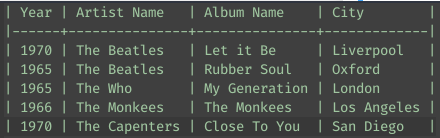

#### Practice by making the PRIMARY KEY only 1 Column (not 2 or more)

In [15]:
session.execute("DROP TABLE IF EXISTS music_library")
query = """
CREATE TABLE IF NOT EXISTS music_library
(year int, artist_name varchar, album_name varchar, city varchar, PRIMARY KEY (artist_name))"""

try:
    session.execute(query)
except Exception as e:
    print(e)

### Let's insert the data into the table

In [16]:
query = """
INSERT INTO music_library (year, artist_name, album_name, city)
VALUES (%s, %s, %s, %s)
"""

def insert_music(year, artist_name, album_name, city):
    try:
        session.execute(query, (year, artist_name, album_name, city))
    except Exception as e:
        print(e)

insert_music(1970, "The Beatles", "Let it Be", "Liverpool")
insert_music(1965, "The Beatles", "Rubber Soul", "Oxford")
insert_music(1965, "The Who", "My Generation", "London")
insert_music(1966, "The Monkees", "The Monkees", "Los Angeles")
insert_music(1970, "The Carpenters", "Close To You", "San Diego")

### Validate the Data Model -- Does it give you two rows?

In [22]:
query = """
select * from music_library WHERE artist_name = 'The Beatles'
"""
try:
    rows = session.execute(query)
except Exception as e:
    print(e)
    
for row in rows:
    print (row.year, row.artist_name, row.album_name, row.city)

1965 The Beatles Rubber Soul Oxford


### If you used just one column as your PRIMARY KEY, your output should be:
1965 The Beatles Rubber Soul Oxford


### That didn't work out as planned! Why is that?  Did you create a unique primary key?

### Try again - Create a new table with a composite key this time

In [25]:
session.execute("DROP TABLE IF EXISTS music_library")
query = """
CREATE TABLE music_library (year int, artist_name varchar, album_name varchar, city varchar, PRIMARY KEY (artist_name, album_name))
"""
try:
    session.execute(query)
except Exception as e:
    print(e)

In [26]:
## You can opt to change the sequence of columns to match your composite key. \ 
## Make sure to match the values in the INSERT statement

query = """
INSERT INTO music_library (year, artist_name, album_name, city)
VALUES (%s, %s, %s, %s)
"""

def insert_music(year, artist_name, album_name, city):
    try:
        session.execute(query, (year, artist_name, album_name, city))
    except Exception as e:
        print(e)

insert_music(1970, "The Beatles", "Let it Be", "Liverpool")
insert_music(1965, "The Beatles", "Rubber Soul", "Oxford")
insert_music(1965, "The Who", "My Generation", "London")
insert_music(1966, "The Monkees", "The Monkees", "Los Angeles")
insert_music(1970, "The Carpenters", "Close To You", "San Diego")

### Validate the Data Model -- Did it work?

In [28]:
query = "select * from music_library WHERE artist_name='The Beatles'"
try:
    rows = session.execute(query)
except Exception as e:
    print(e)
    
for row in rows:
    print (row.year, row.artist_name, row.album_name, row.city)

1970 The Beatles Let it Be Liverpool
1965 The Beatles Rubber Soul Oxford


### Your output should be:
1970 The Beatles Let it Be Liverpool<br>
1965 The Beatles Rubber Soul Oxford

### Drop the tables

In [29]:
query = "drop table music_library"
try:
    rows = session.execute(query)
except Exception as e:
    print(e)

### Close the session and cluster connection

In [30]:
session.shutdown()
cluster.shutdown()